In [26]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
import sklearn.metrics as metrics

In [27]:
creditcard=pd.read_csv('./data/clustering.csv')
creditcard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [28]:
creditcard=creditcard.drop('CUST_ID', axis = 1) 

In [29]:
creditcard.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS       313
CREDIT_LIMIT             1
TENURE                   0
PURCHASES_FREQUENCY      0
BALANCE_FREQUENCY        0
dtype: int64

In [30]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)

In [31]:
creditcard = imputer.fit_transform(creditcard)

In [32]:
scaler = StandardScaler()
creditcard_std = scaler.fit_transform(creditcard)

In [33]:
from sklearn.preprocessing import normalize
creditcard_df = normalize(creditcard_std)

In [34]:
pca = PCA(n_components = 2) 
creditcard_pca = pca.fit_transform(creditcard_df) 

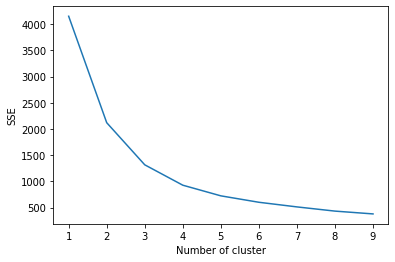

In [35]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(creditcard_pca)
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

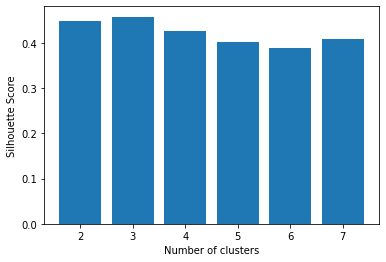

In [36]:
from sklearn.metrics import silhouette_score

silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(creditcard_pca, KMeans(n_clusters = n_cluster).fit_predict(creditcard_pca))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [37]:
X=creditcard_pca

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.4471784856922535
For n_clusters = 3 The average silhouette_score is : 0.4575015480632969
For n_clusters = 4 The average silhouette_score is : 0.4261270612881298
For n_clusters = 5 The average silhouette_score is : 0.40050614713788024
For n_clusters = 6 The average silhouette_score is : 0.38977271415320897


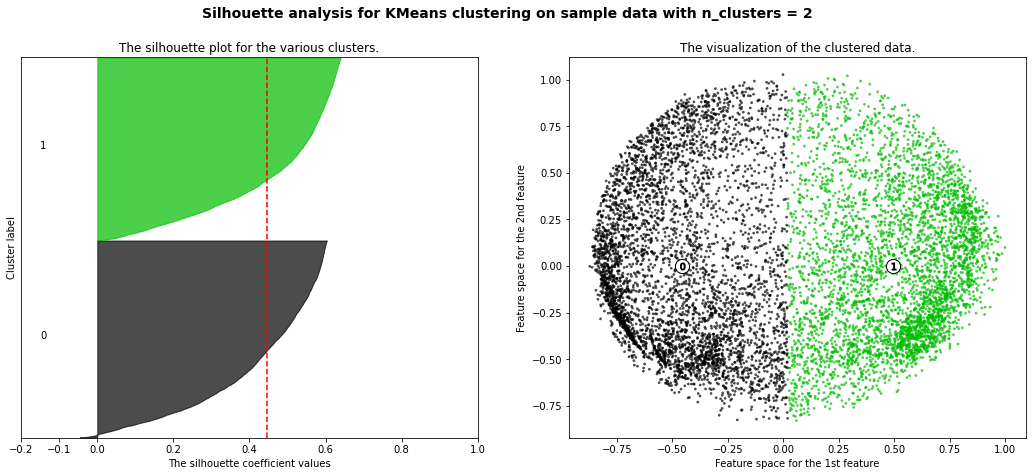

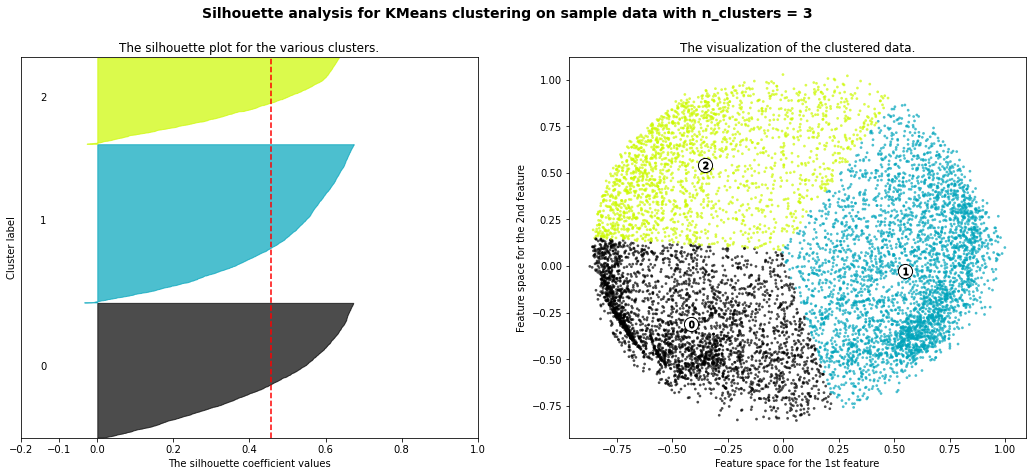

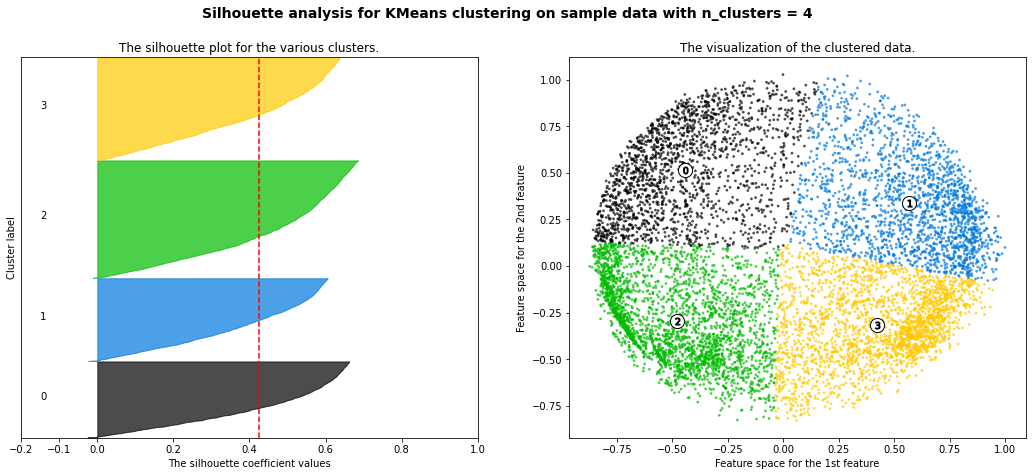

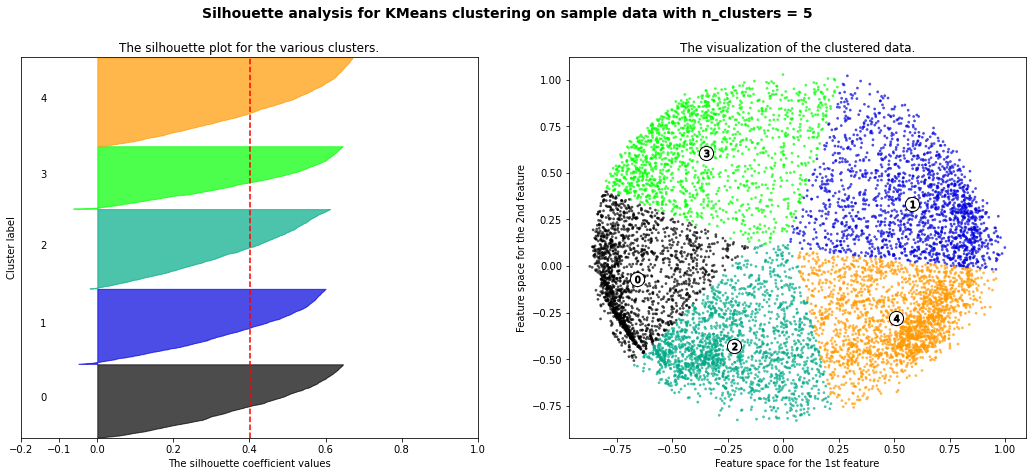

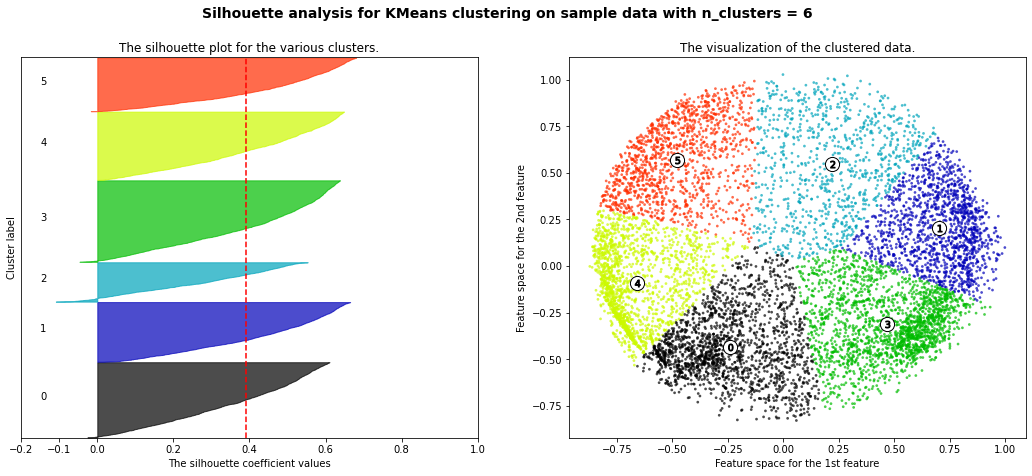

In [38]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)



range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.15, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2,-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [43]:
eps_list=np.arange(0.1,1,0.1)
minsample_list=np.arange(1,10,2)
for eps in eps_list:
    for min_sample in minsample_list:
        dbscan_cluster = DBSCAN(eps=eps, min_samples=min_sample)
        cluster_labels = dbscan_cluster.fit_predict(creditcard_df)
        silhouette_score = silhouette_score(creditcard_df, cluster_labels)
        print("For n_clusters =", n_clusters,"min_sample is=",min_sample,"eps is",eps,"DBSCAN silhouette score is:",silhouette_score)
        

TypeError: 'numpy.float64' object is not callable

In [42]:
from sklearn.cluster import DBSCAN

dbscan_cluster = DBSCAN(eps=0.5, min_samples=2)
cluster_labels = dbscan_cluster.fit_predict(creditcard_df)

In [44]:
from sklearn.metrics import silhouette_samples, silhouette_score

eps_list=np.arange(0.1,1,0.1)
minsample_list=np.arange(1,10,2)
for eps in eps_list:
    for min_sample in minsample_list:
        dbscan_cluster = DBSCAN(eps=eps, min_samples=min_sample)
        cluster_labels = dbscan_cluster.fit_predict(creditcard_df)
        print("DBSCAN çözümünün siluet skoru: {}"
      .format(metrics.silhouette_score(creditcard_df, cluster_labels, metric='euclidean')))
        

DBSCAN çözümünün siluet skoru: 0.01728828719176331
DBSCAN çözümünün siluet skoru: -0.47548816861816484
DBSCAN çözümünün siluet skoru: -0.4075933685124062
DBSCAN çözümünün siluet skoru: -0.38931711289891047
DBSCAN çözümünün siluet skoru: -0.3431771946893854
DBSCAN çözümünün siluet skoru: -0.26771370317551413
DBSCAN çözümünün siluet skoru: -0.532567547380794
DBSCAN çözümünün siluet skoru: -0.47933357205155147
DBSCAN çözümünün siluet skoru: -0.37511383471373677
DBSCAN çözümünün siluet skoru: -0.3419192832895075
DBSCAN çözümünün siluet skoru: -0.48965634812971853
DBSCAN çözümünün siluet skoru: -0.4817279862805121
DBSCAN çözümünün siluet skoru: -0.32469437013156677
DBSCAN çözümünün siluet skoru: -0.18880831483990318
DBSCAN çözümünün siluet skoru: -0.11352063774779574
DBSCAN çözümünün siluet skoru: -0.5293434013960251
DBSCAN çözümünün siluet skoru: -0.2784656435068894
DBSCAN çözümünün siluet skoru: -0.12460714272323772
DBSCAN çözümünün siluet skoru: 0.03671885348488363
DBSCAN çözümünün silue

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [46]:
from sklearn.mixture import GaussianMixture
siliuette_list_GMM = []

for cluster in range(2,21,2):
    for covariance_type in ['full', 'tied', 'diag', 'spherical']:
        gmm  = GaussianMixture(n_components = cluster,covariance_type = covariance_type, random_state = 40).fit_predict(creditcard_pca)
        sil_score = metrics.silhouette_score(creditcard_pca, gmm, metric='euclidean')
        siliuette_list_GMM.append((cluster, sil_score, covariance_type, len(set(gmm)) ) )
        
df_gmm = pd.DataFrame(siliuette_list_GMM, columns=['cluster', 'sil_score','covariance_type', 'number_of_clusters'])

In [47]:
df_gmm.sort_values('sil_score', ascending=False).tail()

,cluster,sil_score,covariance_type,number_of_clusters
32,18,0.300698,full,18
16,10,0.295216,full,10
18,10,0.293646,diag,10
10,6,0.273798,diag,6
14,8,0.265253,diag,8


In [49]:
from sklearn.cluster import AgglomerativeClustering
siliuette_list_hierarchical = []

for cluster in range(2,20,2):
    for linkage_method in ['ward', 'average', 'complete']:
        agglomerative = AgglomerativeClustering(linkage=linkage_method, affinity='euclidean',n_clusters=cluster).fit_predict(creditcard_pca)
        sil_score = metrics.silhouette_score(creditcard_pca, agglomerative, metric='euclidean')
        siliuette_list_hierarchical.append((cluster, sil_score, linkage_method, len(set(agglomerative)) ) )
        
df_hierarchical = pd.DataFrame(siliuette_list_hierarchical, columns=['cluster', 'sil_score','linkage_method', 'number_of_clusters'])

In [50]:
df_hierarchical.sort_values('sil_score', ascending=False)

,cluster,sil_score,linkage_method,number_of_clusters
1,2,0.430560,average,2
0,2,0.417785,ward,2
5,4,0.382287,complete,4
7,6,0.369334,average,6
10,8,0.363600,average,8
4,4,0.363574,average,4
3,4,0.362771,ward,4
6,6,0.350601,ward,6
9,8,0.350155,ward,8
13,10,0.325479,average,10
